In [26]:
from pandas import read_csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [27]:
fraud = read_csv('Fraud_check.csv')

In [28]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [29]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [30]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [31]:
fraud.duplicated().sum()

0

In [32]:
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [33]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [34]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
fraud.iloc[:,0].max()

99619

In [36]:
fraud.iloc[:,0].min()

10003

# Lets assume: taxable_income <= 30000 as “Risky=0” and others are
“Good=1”

In [37]:
fraud['tax']=pd.cut(fraud["Taxable.Income"],bins=[10002,30000,99620],labels=['Risky','Good'])

In [38]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [39]:
fraud=pd.get_dummies(fraud,columns=['tax'],drop_first=True)

In [40]:
fraud=fraud.drop('Taxable.Income',axis=1)

In [41]:
fraud

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,tax_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


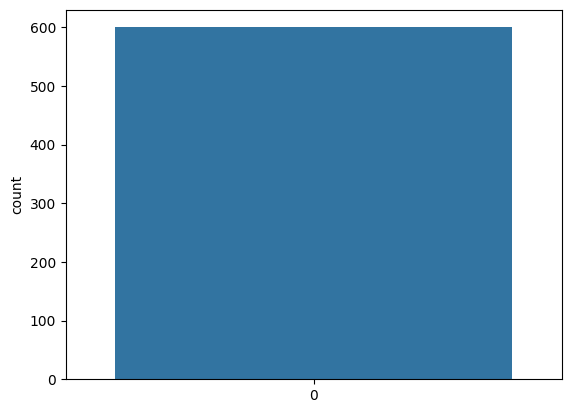

In [42]:
sns.countplot(fraud['tax_Good']);

In [43]:
#sns.pairplot(data=fraud,hue='tax_Good');

In [44]:
X = fraud.drop(['tax_Good'], axis=1)
Y = fraud['tax_Good']

In [45]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [48]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

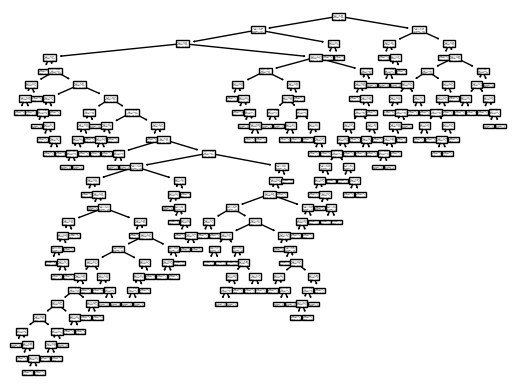

In [49]:
tree.plot_tree(model);

In [50]:
from sklearn import metrics
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    89
0    31
dtype: int64

In [51]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred})
df

,Actual values,Predicted Values
69,1,0
27,1,1
488,1,1
540,0,0
285,1,0
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [52]:
np.mean(pred==y_test)

0.575

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.10      0.12      0.11        26
           1       0.74      0.70      0.72        94

    accuracy                           0.57       120
   macro avg       0.42      0.41      0.41       120
weighted avg       0.60      0.57      0.59       120



# Decision Tree Classifier (Entropy)

In [54]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [55]:
#tree.plot_tree(model1);

In [56]:
from sklearn import metrics
pred1=model1.predict(x_test)
pd.Series(pred1).value_counts()

1    100
0     20
dtype: int64

In [57]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred1})
df

,Actual values,Predicted Values
69,1,1
27,1,1
488,1,1
540,0,0
285,1,0
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [58]:
np.mean(pred1==y_test)

0.6833333333333333

In [59]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.20      0.15      0.17        26
           1       0.78      0.83      0.80        94

    accuracy                           0.68       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.65      0.68      0.67       120



In [60]:
cn = ['1','0']
fn = ['City.Population', 'Work.Experience', 'Undergrad_YES',
'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']

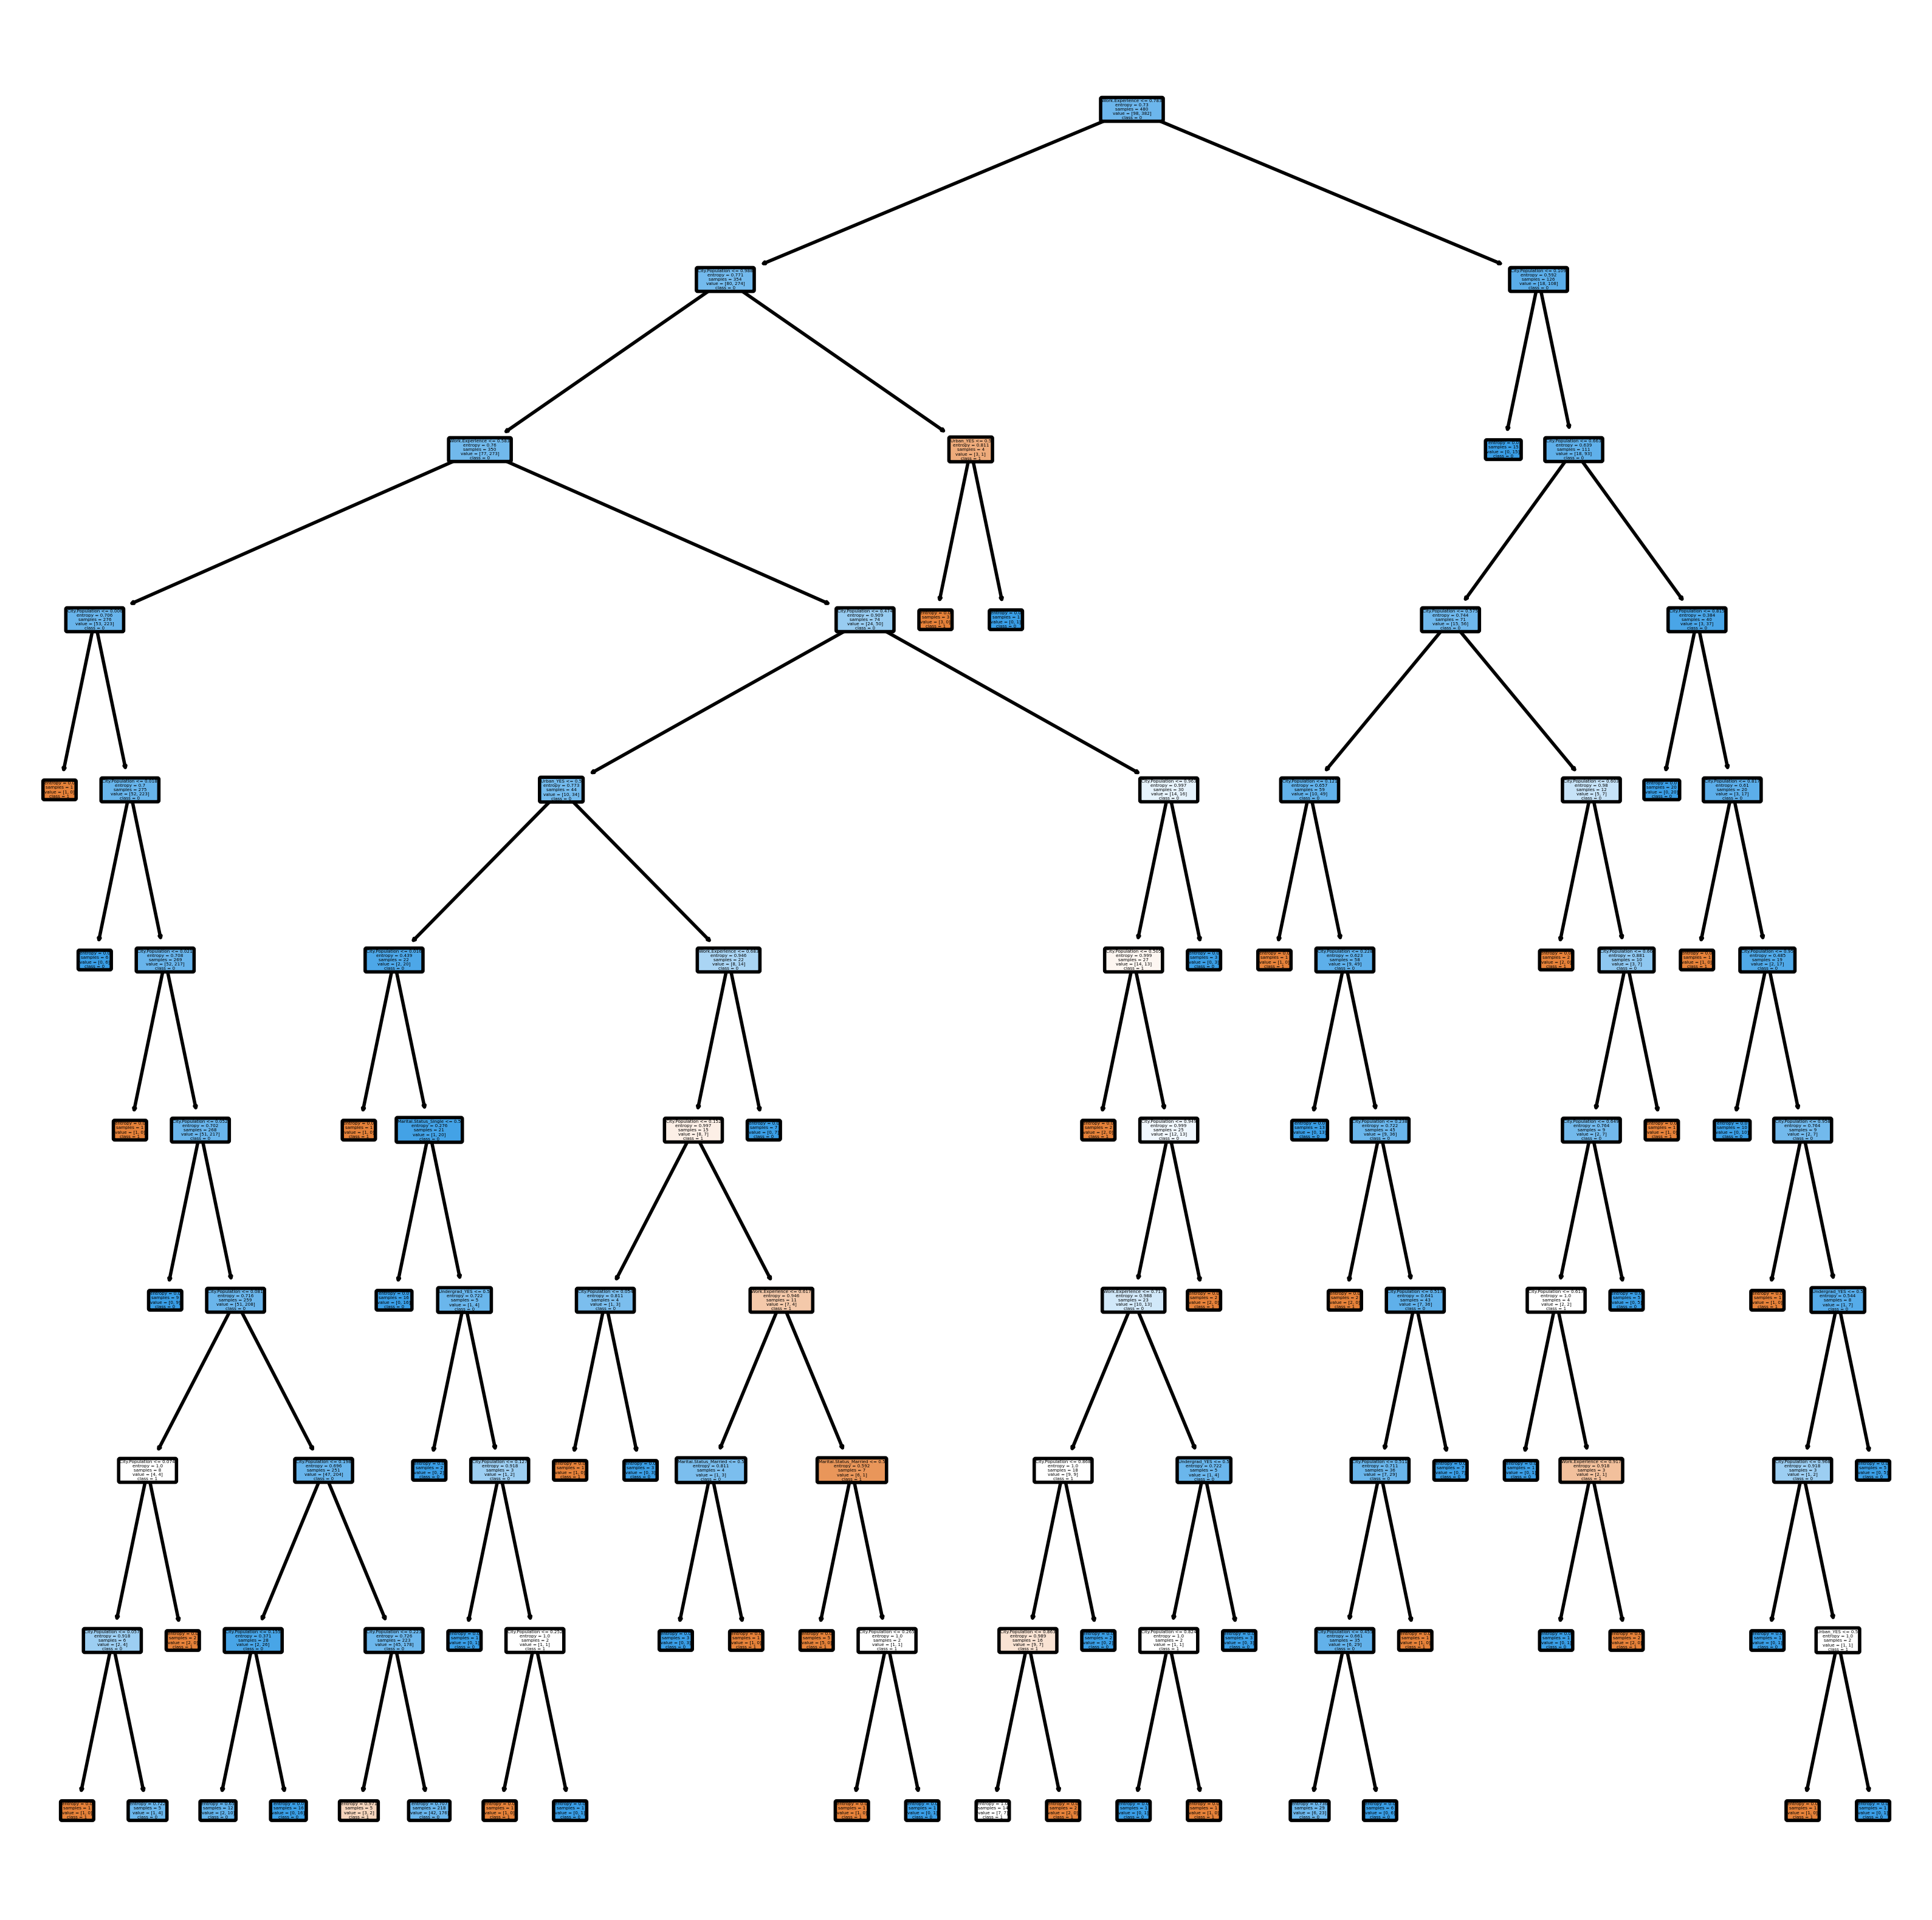

In [62]:
fig,axes =plt.subplots(figsize=(10,10),dpi=400)
tree.plot_tree(model1,
              feature_names=fn,
              class_names=cn,
              filled=True,rounded=True);

# Decision Tree Classifier (Gini)

In [63]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
from sklearn import metrics
pred2=model2.predict(x_test)
pd.Series(pred2).value_counts()

1    108
0     12
dtype: int64

In [65]:
 df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred2})
df

,Actual values,Predicted Values
69,1,1
27,1,1
488,1,1
540,0,0
285,1,1
...,...,...
131,1,1
354,0,1
230,0,1
175,1,1


In [66]:
np.mean(pred2==y_test)

0.7166666666666667

In [67]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.17      0.08      0.11        26
           1       0.78      0.89      0.83        94

    accuracy                           0.72       120
   macro avg       0.47      0.49      0.47       120
weighted avg       0.65      0.72      0.67       120



In [68]:
X.columns

Index(['City.Population', 'Work.Experience', 'Undergrad_YES',
       'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES'],
      dtype='object')

In [69]:
cn = ['1','0']
fn = ['City.Population', 'Work.Experience', 'Undergrad_YES',
'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']

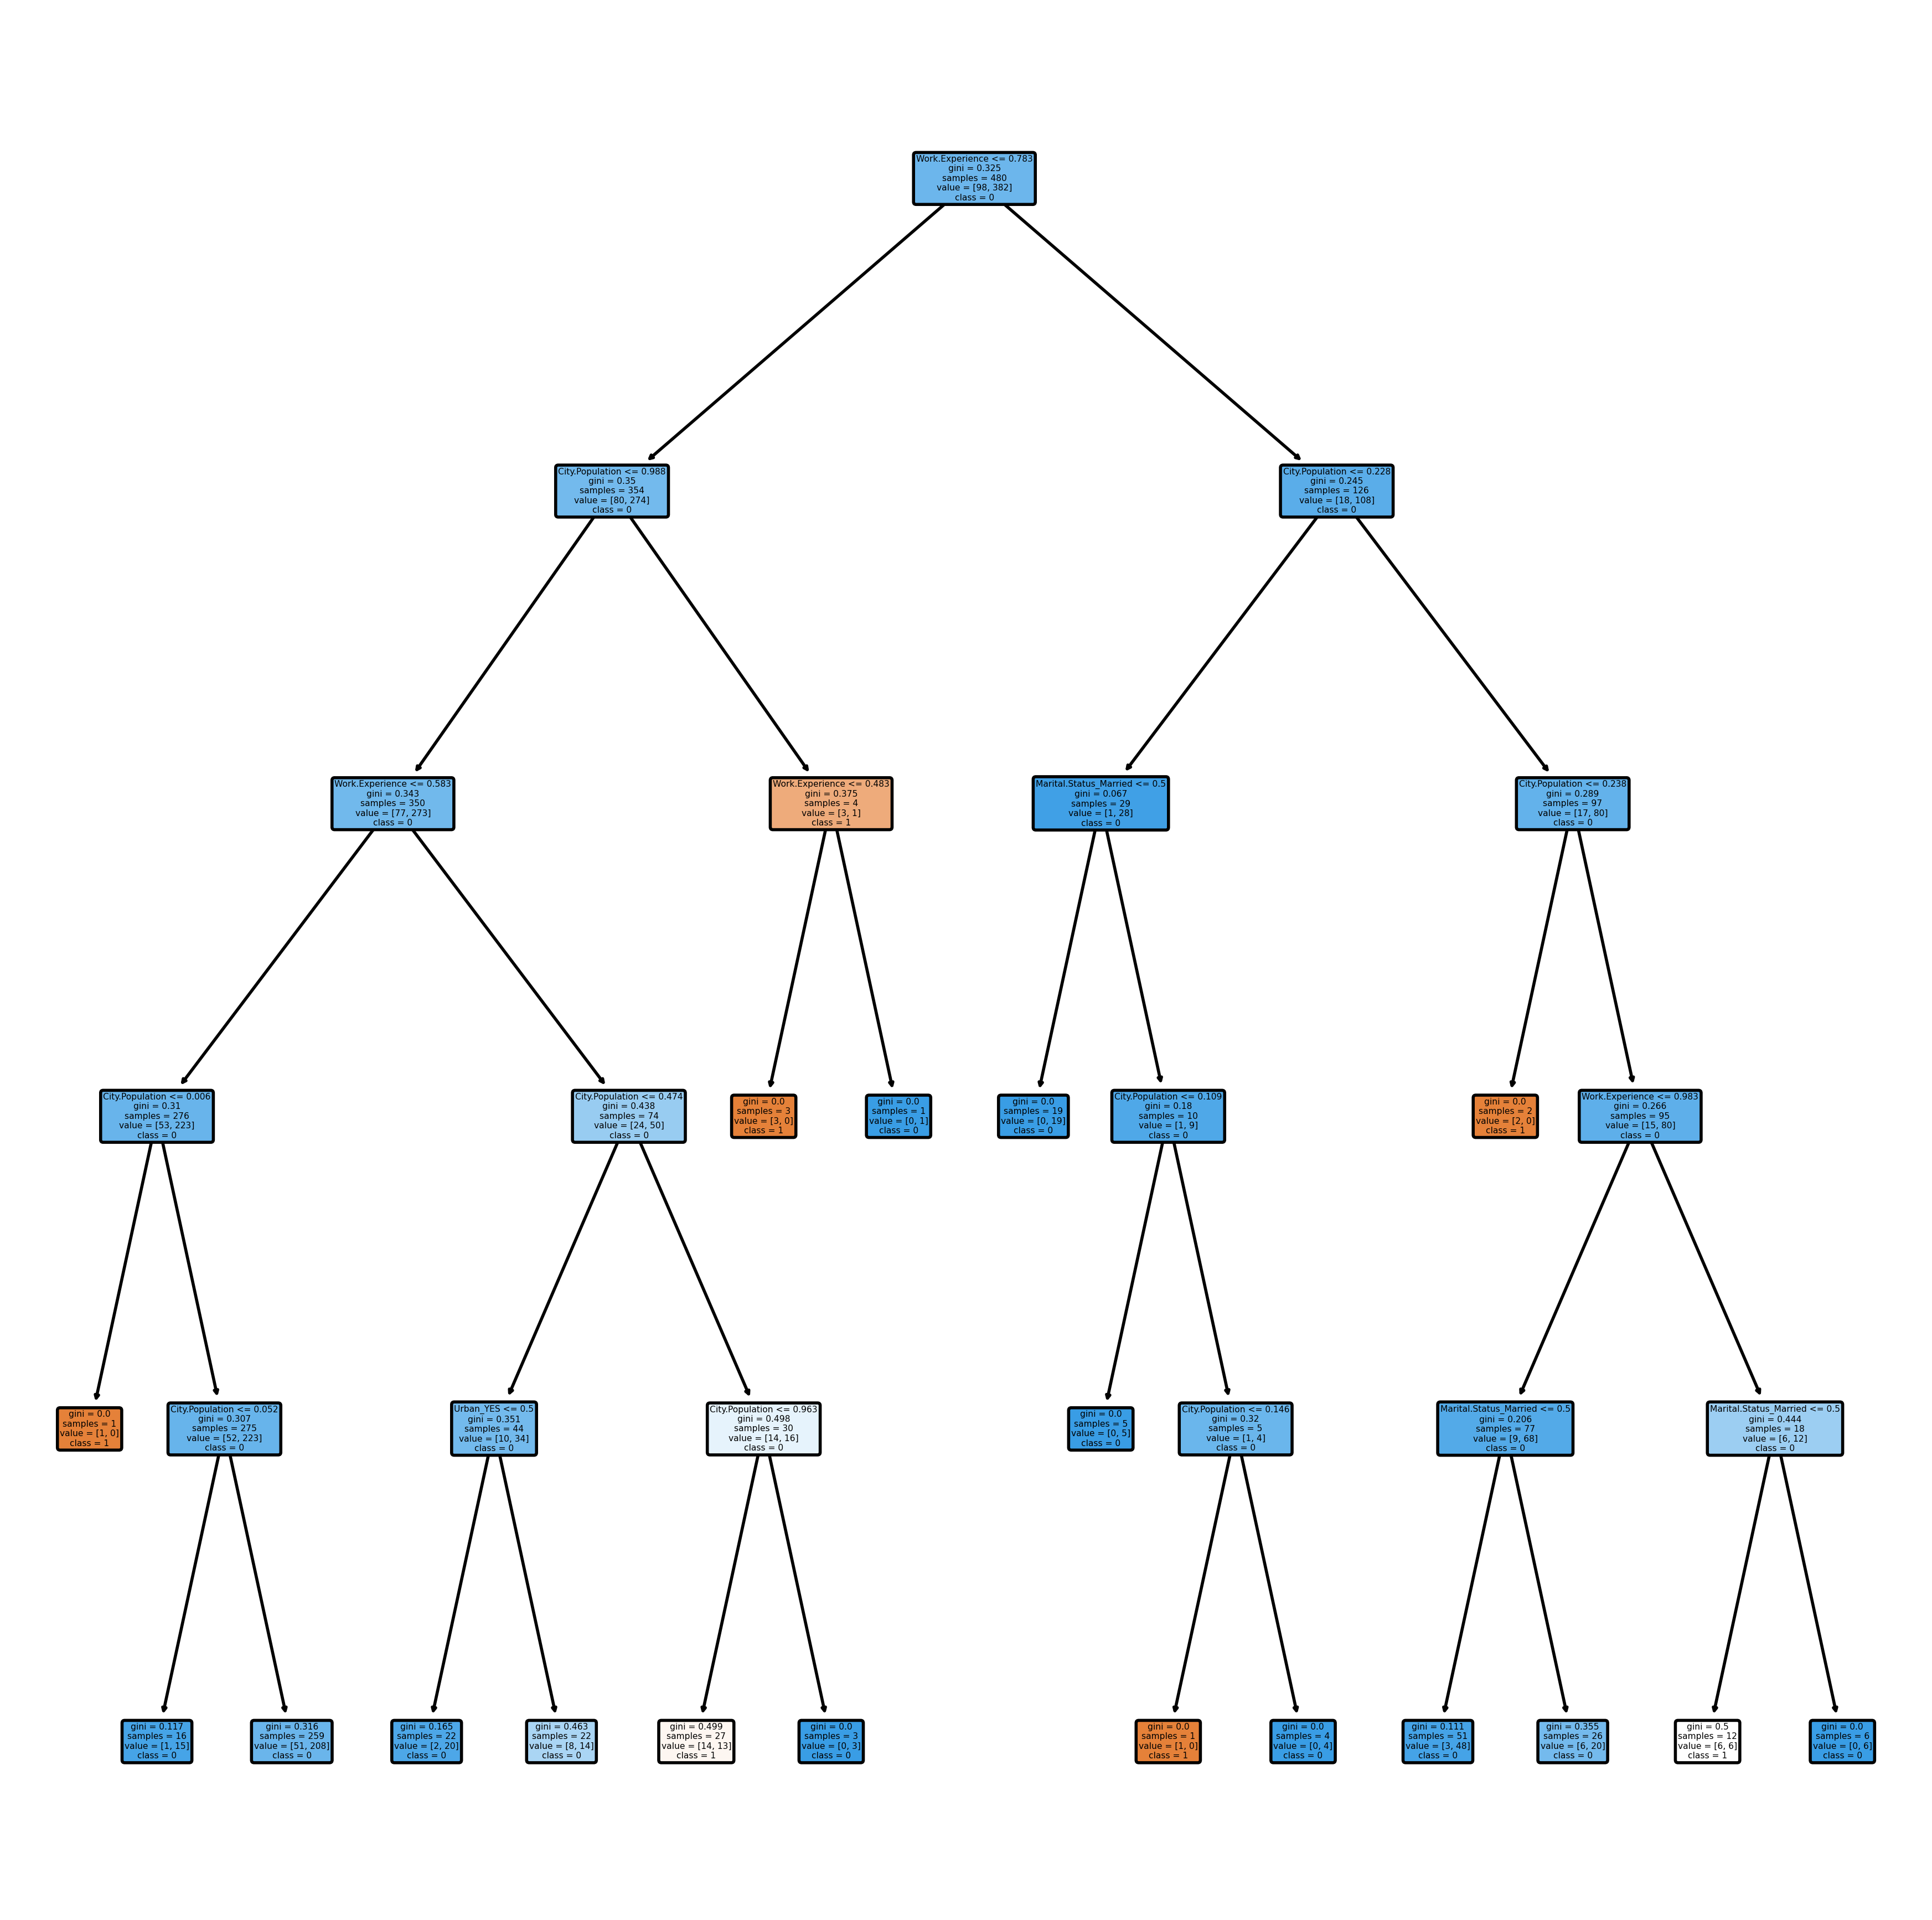

In [70]:
fig,axes =plt.subplots(figsize=(11,11),dpi=400)
tree.plot_tree(model2,
feature_names=fn,
class_names=cn,
filled=True,rounded=True);